In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv('C:\\Users\\Sambhu\\Desktop\\Imarticus\\Class Material\\kaggle\\black_friday_train.csv')

In [3]:
test = pd.read_csv('C:\\Users\\Sambhu\\Desktop\\Imarticus\\Class Material\\kaggle\\black_friday_test.csv')

# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [4]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
# We will combine both the dataset, so that we can do prepocessing on both the dataset

In [7]:
df = pd.concat([train,test])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [9]:
del df['User_ID']

In [10]:
del df['Product_ID']

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
df['Gender'] = le.fit_transform(df['Gender'])

In [13]:
df['Gender'].value_counts()

1    590031
0    193636
Name: Gender, dtype: int64

In [14]:
df['City_Category'] = le.fit_transform(df['City_Category'])

In [15]:
df['City_Category'].value_counts()

1    329739
2    243684
0    210244
Name: City_Category, dtype: int64

In [16]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [17]:
df['Age'].replace(['0-17','18-25','26-35', '36-45', '46-50', '51-55', '55+',],['1','2','3','4','5','6','7'], inplace = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int32  
 1   Age                         783667 non-null  object 
 2   Occupation                  783667 non-null  int64  
 3   City_Category               783667 non-null  int32  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          537685 non-null  float64
 8   Product_Category_3          237858 non-null  float64
 9   Purchase                    550068 non-null  float64
dtypes: float64(3), int32(2), int64(3), object(2)
memory usage: 59.8+ MB


In [19]:
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [20]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [21]:
df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0], inplace= True)

In [23]:
df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0], inplace= True)

In [24]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [25]:
df['Stay_In_Current_City_Years'].replace('4+','4', inplace = True)

In [26]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('int64')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int32  
 1   Age                         783667 non-null  object 
 2   Occupation                  783667 non-null  int64  
 3   City_Category               783667 non-null  int32  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
dtypes: float64(3), int32(2), int64(4), object(1)
memory usage: 59.8+ MB


In [28]:
df_train = df[~df['Purchase'].isnull()]

In [29]:
categorical = ['Gender', 'Occupation', 'City_Category',  'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']

In [30]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

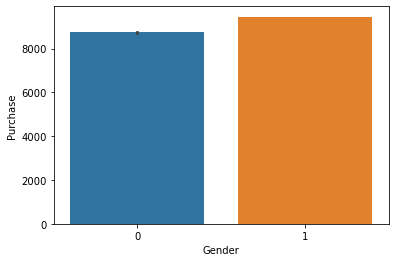

p-value 0.0
Good Predictor


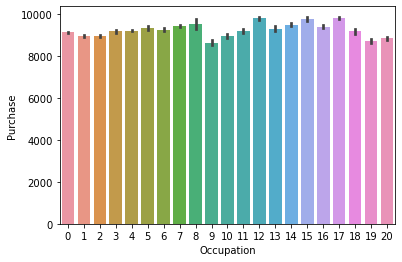

p-value 7.259684172672924e-54
Good Predictor


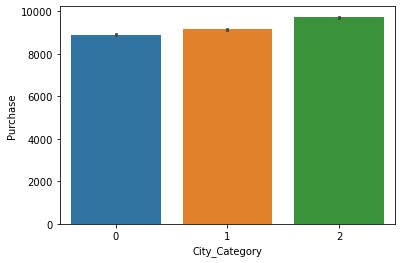

p-value 0.0
Good Predictor


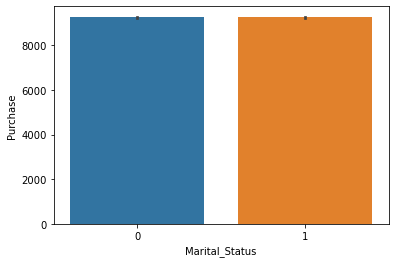

p-value 0.7310947526475329
Bad Predictor


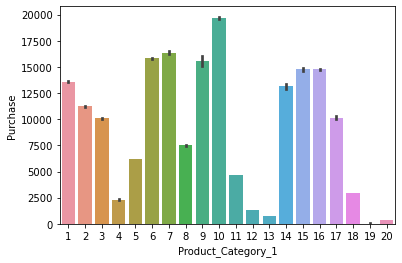

p-value 0.0
Good Predictor


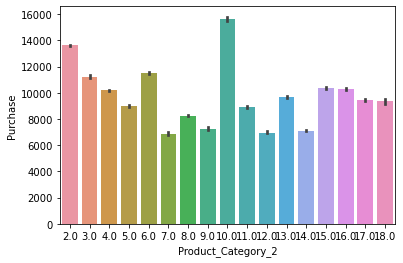

p-value 0.0
Good Predictor


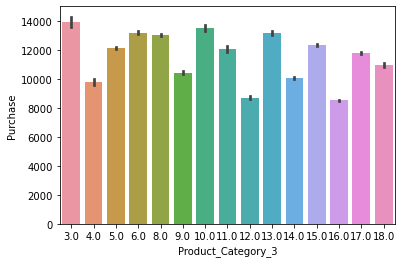

p-value 0.0
Good Predictor


In [31]:
for column in categorical:
    sns.barplot(x = df_train[column], y= df_train['Purchase'])
    plt.show()
    model = ols('Purchase~df_train[column]', data = df_train).fit()
    aov_table = sm.stats.anova_lm(model)
    #print(aov_table)
    p = aov_table['PR(>F)'][0]
    print("p-value", p)
    if p>0.05:
        print("Bad Predictor")
    else:
        print("Good Predictor")

In [32]:
# Null Hypothesis: Average purchase amount between Married and Not Married is same
# Alternate Hypothesis: Atleast one of the groups' average purchase amount is different
# Since p-value for Marital Status is more than 0.05, we accept Null Hypothesis. So, we can drop this feature

In [33]:
df.Purchase.groupby(df.Gender).describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
0,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
1,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [34]:
df.Purchase.groupby(df.Gender).sum().sort_values(ascending=False)

Gender
1    3.909580e+09
0    1.186233e+09
Name: Purchase, dtype: float64

In [35]:
df.Purchase.groupby(df.Occupation).describe()

,count,mean,std,min,25%,50%,75%,max
Occupation,,,,,,,,
0,69638.0,9124.428588,4971.757402,12.0,5445.00,8001.0,11957.00,23961.0
1,47426.0,8953.193270,4838.482159,12.0,5825.00,7966.0,11702.75,23960.0
2,26588.0,8952.481683,4939.418663,12.0,5419.00,7952.0,11718.00,23955.0
3,17650.0,9178.593088,5000.942719,12.0,5478.00,8008.0,11961.00,23914.0
4,72308.0,9213.980251,5043.674855,12.0,5441.75,8043.0,12034.00,23961.0
5,12177.0,9333.149298,5025.616603,12.0,5452.00,8080.0,12091.00,23924.0
6,20355.0,9256.535691,4989.216005,12.0,5888.00,8050.0,11971.50,23951.0
7,59133.0,9425.728223,5086.097089,12.0,5878.00,8069.0,12486.00,23948.0
8,1546.0,9532.592497,4916.641374,14.0,5961.75,8419.5,12607.00,23869.0


In [36]:
df.Purchase.groupby(df.Occupation).sum().sort_values(ascending=False)

Occupation
4     666244484.0
0     635406958.0
7     557371587.0
1     424614144.0
17    393281453.0
12    305449446.0
20    296570442.0
14    259454692.0
16    238346955.0
2     238028583.0
6     188416784.0
3     162002168.0
15    118960211.0
10    115844465.0
5     113649759.0
11    106751618.0
19     73700617.0
13     71919481.0
18     60721461.0
9      54340046.0
8      14737388.0
Name: Purchase, dtype: float64

In [37]:
df.Purchase.groupby(df.City_Category).describe()

,count,mean,std,min,25%,50%,75%,max
City_Category,,,,,,,,
0,147720.0,8911.939216,4892.115238,12.0,5403.0,7931.0,11786.0,23961.0
1,231173.0,9151.300563,4955.496566,12.0,5460.0,8005.0,11986.0,23960.0
2,171175.0,9719.920993,5189.465121,12.0,6031.5,8585.0,13197.0,23961.0


In [38]:
df.Purchase.groupby(df.City_Category).sum().sort_values(ascending=False)

City_Category
1    2.115534e+09
2    1.663807e+09
0    1.316472e+09
Name: Purchase, dtype: float64

In [39]:
df.Purchase.groupby(df.Marital_Status).describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


In [40]:
df.Purchase.groupby(df.Marital_Status).sum().sort_values(ascending=False)

Marital_Status
0    3.008927e+09
1    2.086885e+09
Name: Purchase, dtype: float64

In [41]:
df.Purchase.groupby(df.Product_Category_1).describe()

,count,mean,std,min,25%,50%,75%,max
Product_Category_1,,,,,,,,
1,140378.0,13606.218596,4298.834894,3790.0,11546.00,15245.0,15812.00,19708.0
2,23864.0,11251.935384,3570.642713,3176.0,9645.75,12728.5,13212.00,16504.0
3,20213.0,10096.705734,2824.626957,2638.0,8198.00,10742.0,13211.00,13717.0
4,11753.0,2329.659491,812.540292,684.0,2058.00,2175.0,2837.00,3556.0
5,150933.0,6240.088178,1909.091687,1713.0,5242.00,6912.0,7156.00,8907.0
6,20466.0,15838.478550,4011.233690,3981.0,12505.00,16312.0,20051.00,20690.0
7,3721.0,16365.689600,4174.554105,4061.0,12848.00,16700.0,20486.00,21080.0
8,113925.0,7498.958078,2013.015062,1939.0,6036.00,7905.0,9722.00,10082.0
9,410.0,15537.375610,5330.847116,4528.0,13583.50,14388.5,18764.00,23531.0


In [42]:
df.Purchase.groupby(df.Product_Category_1).sum().sort_values(ascending=False)

Product_Category_1
1     1.910014e+09
5     9.418352e+08
8     8.543188e+08
6     3.241503e+08
2     2.685162e+08
3     2.040847e+08
16    1.451206e+08
11    1.137911e+08
10    1.008373e+08
15    9.296904e+07
7     6.089673e+07
4     2.738049e+07
14    2.001470e+07
18    9.290201e+06
9     6.370324e+06
17    5.878699e+06
12    5.331844e+06
13    4.008601e+06
20    9.447270e+05
19    5.937800e+04
Name: Purchase, dtype: float64

In [43]:
df.Purchase.groupby(df.Product_Category_2).describe()

,count,mean,std,min,25%,50%,75%,max
Product_Category_2,,,,,,,,
2.0,49217.0,13619.356401,4275.570831,3790.0,11551.00,15241.0,15810.00,19708.0
3.0,2884.0,11235.359570,3581.718925,3177.0,9651.50,12714.5,13188.25,19573.0
4.0,25677.0,10215.192001,3172.992496,2639.0,8174.00,10681.0,13066.00,19612.0
5.0,26235.0,9027.821574,5807.891048,684.0,2826.00,9892.0,13509.00,19708.0
6.0,16466.0,11503.551379,5205.810351,1714.0,7060.25,11611.0,15632.00,19708.0
7.0,626.0,6884.683706,1765.432375,1718.0,5423.25,7058.0,8651.75,8906.0
8.0,237726.0,8261.291933,4652.238932,12.0,5337.00,7166.0,9821.00,23959.0
9.0,5693.0,7277.006851,3522.511363,710.0,5241.00,6955.0,8838.00,16504.0
10.0,3043.0,15648.729543,4475.656738,1908.0,12329.00,16341.0,20122.50,20690.0


In [44]:
df.Purchase.groupby(df.Product_Category_2).sum().sort_values(ascending=False)

Product_Category_2
8.0     1.963924e+09
2.0     6.703039e+08
16.0    4.453397e+08
15.0    3.920672e+08
14.0    3.915569e+08
4.0     2.622955e+08
5.0     2.368449e+08
6.0     1.894175e+08
11.0    1.263662e+08
17.0    1.254954e+08
13.0    1.019754e+08
10.0    4.761908e+07
9.0     4.142800e+07
12.0    3.856041e+07
3.0     3.240278e+07
18.0    2.590626e+07
7.0     4.309812e+06
Name: Purchase, dtype: float64

In [45]:
df.Purchase.groupby(df.Product_Category_3).describe()

,count,mean,std,min,25%,50%,75%,max
Product_Category_3,,,,,,,,
3.0,613.0,13939.696574,4262.999709,3846.0,11590.00,15288.0,15886.00,19698.0
4.0,1875.0,9794.386667,4085.114927,3177.0,6641.00,9850.0,12910.50,19680.0
5.0,16658.0,12117.786889,3931.937020,2639.0,9834.25,11767.5,15334.00,19708.0
6.0,4890.0,13194.311043,4149.266327,3792.0,11499.25,15174.5,15706.00,19708.0
8.0,12562.0,13024.918882,5346.600610,685.0,9594.25,15204.0,16362.00,19708.0
9.0,11579.0,10431.697210,5692.208568,684.0,4522.00,11390.0,15457.50,19707.0
10.0,1726.0,13505.813441,3827.550957,3185.0,10125.50,13051.0,16287.00,20685.0
11.0,1805.0,12091.437673,4677.665726,1750.0,8069.00,11912.0,15610.00,19705.0
12.0,9246.0,8715.512762,4187.046841,684.0,5422.00,8370.0,11023.75,19706.0


In [46]:
df.Purchase.groupby(df.Product_Category_3).sum().sort_values(ascending=False)

Product_Category_3
16.0    3.542035e+09
15.0    3.456628e+08
5.0     2.018581e+08
17.0    1.965816e+08
14.0    1.852492e+08
8.0     1.636190e+08
9.0     1.207886e+08
12.0    8.058363e+07
13.0    7.197756e+07
6.0     6.452018e+07
18.0    5.089114e+07
10.0    2.331103e+07
11.0    2.182504e+07
4.0     1.836448e+07
3.0     8.545034e+06
Name: Purchase, dtype: float64

In [47]:
del df['Marital_Status']

In [48]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [49]:
categorical_new = ['City_Category', 'Occupation', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']

In [50]:
for column in categorical_new:
    print(column)
    tukey= pairwise_tukeyhsd(df_train['Purchase'],df_train[column], alpha=0.05)
    print(tukey)

City_Category
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
     0      1 239.3613  -0.0 200.2276  278.495   True
     0      2 807.9818  -0.0 766.2598 849.7038   True
     1      2 568.6204  -0.0 531.1583 606.0826   True
-----------------------------------------------------
Occupation
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------
     0      1  -171.2353    0.0  -277.7801  -64.6905   True
     0      2  -171.9469 0.0004  -300.9595  -42.9343   True
     0      3    54.1645 0.9996   -96.6468  204.9758  False
     0      4    89.5517 0.0948    -5.4645  184.5678  False
     0      5   208.7207  0.004    32.9384   384.503   True
     0      6   132.1071 0.1119   -10.4857  274.6999  False
     0      7   301.2996    0.0   201.2252   401.374   Tr

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
   2.0    3.0 -2383.9968    0.0 -2694.2123 -2073.7814   True
   2.0    4.0 -3404.1644    0.0 -3528.8136 -3279.5152   True
   2.0    5.0 -4591.5348    0.0 -4715.3098 -4467.7598   True
   2.0    6.0  -2115.805    0.0 -2261.5758 -1970.0342   True
   2.0    7.0 -6734.6727    0.0 -7385.9305 -6083.4149   True
   2.0    8.0 -5358.0645    0.0 -5438.2503 -5277.8787   True
   2.0    9.0 -6342.3496    0.0 -6569.0191   -6115.68   True
   2.0   10.0  2029.3731    0.0  1726.9105  2331.8358   True
   2.0   11.0 -4678.7759    0.0  -4833.295 -4524.2568   True
   2.0   12.0 -6643.8839    0.0 -6873.5655 -6414.2023   True
   2.0   13.0  -3936.004    0.0 -4109.8501 -3762.1579   True
   2.0   14.0 -6514.0915    0.0 -6614.5126 -6413.6704   True
   2.0   15.0 -3262.2787    0.0 -3372.9706 -3151.5869   True
   2.0   16.0 -3323.6745

# Reducing Levels with Tukey

In [51]:
df['Occupation'].replace([3,4,6,8,10,11,13],[0,0,0,0,0,0,0], inplace=True)

In [52]:
df['Occupation'].replace([2,18,20],[1,1,1], inplace=True)

In [53]:
df['Occupation'].replace([7,14,16],[5,5,5], inplace=True)

In [54]:
df['Occupation'].unique()

array([ 0,  5, 15,  1,  9, 12, 17, 19], dtype=int64)

In [55]:
df['Product_Category_1'].replace([3,6,15,19],[17,9,16,20], inplace=True)

In [56]:
df.Product_Category_1.unique()

array([17,  1, 12,  8,  5,  4,  2,  9, 14, 11, 13, 16,  7, 18, 10, 20],
      dtype=int64)

In [57]:
df['Product_Category_2'].replace([3,4,5],[6,17,11], inplace=True)

In [58]:
df['Product_Category_2'].replace([9,12,14],[7,7,7], inplace=True)

In [59]:
df['Product_Category_2'].replace([13,17],[18,18], inplace=True)

In [60]:
df['Product_Category_2'].replace(15,16, inplace=True)

In [61]:
df.Product_Category_2.unique()

array([ 8.,  6.,  7.,  2., 16., 11., 18., 10.])

In [62]:
df['Product_Category_3'].replace([3,4,5],[10,14,11], inplace=True)

In [63]:
df['Product_Category_3'].replace([8,10,13],[6,6,6], inplace=True)

In [64]:
df['Product_Category_3'].replace([15,17],[11,11], inplace=True)

In [65]:
df.Product_Category_3.unique()

array([16., 14., 11.,  6.,  9., 12., 18.])

In [66]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,0,0,2,17,8.0,16.0,8370.0
1,0,1,0,0,2,1,6.0,14.0,15200.0
2,0,1,0,0,2,12,8.0,16.0,1422.0
3,0,1,0,0,2,12,7.0,16.0,1057.0
4,1,7,5,2,4,8,8.0,16.0,7969.0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int32  
 1   Age                         783667 non-null  object 
 2   Occupation                  783667 non-null  int64  
 3   City_Category               783667 non-null  int32  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
dtypes: float64(3), int32(2), int64(3), object(1)
memory usage: 53.8+ MB


In [68]:
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

In [69]:
df['Product_Category_2'].value_counts()

8.0     337299
16.0    115801
7.0      95666
18.0     74890
2.0      70498
11.0     57395
6.0      27698
10.0      4420
Name: Product_Category_2, dtype: int64

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int32  
 1   Age                         783667 non-null  object 
 2   Occupation                  783667 non-null  int64  
 3   City_Category               783667 non-null  int32  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
dtypes: float64(3), int32(2), int64(3), object(1)
memory usage: 53.8+ MB


In [71]:
df['Age'] = df['Age'].astype('int64')

Text(0.5, 1.0, 'Age Vs Purchase')

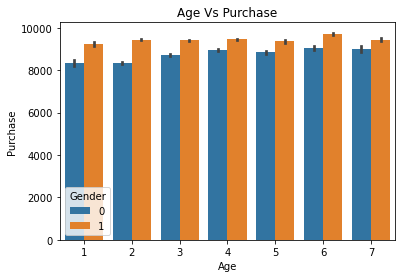

In [72]:
sns.barplot(x = 'Age', y= 'Purchase',hue='Gender',data=df)
plt.title('Age Vs Purchase')

In [73]:
# Men are purchasing more than women, Purchase is more or less uniformly distributed across all age groups in the last 4 months

Text(0.5, 1.0, 'Occupation Vs Purchase')

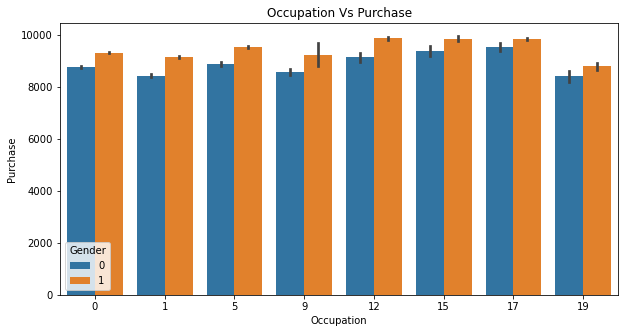

In [74]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'Occupation', y= 'Purchase',hue='Gender',data=df)
plt.title('Occupation Vs Purchase')

In [75]:
# Purchase is more or less uniformly distributed across all occupation groups in the last 4 months

Text(0.5, 1.0, 'Product_Category_1 Vs Purchase')

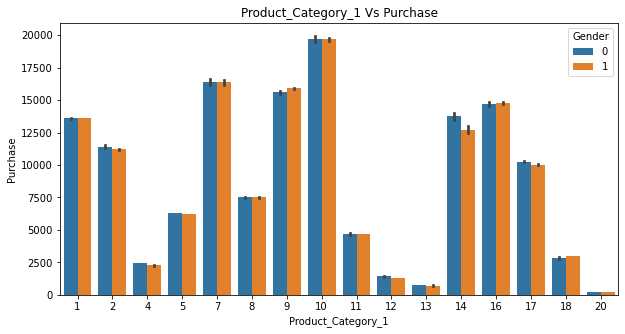

In [76]:
plt.figure(figsize=(10,5))
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df)
plt.title('Product_Category_1 Vs Purchase')

Text(0.5, 1.0, 'Product_Category_2 Vs Purchase')

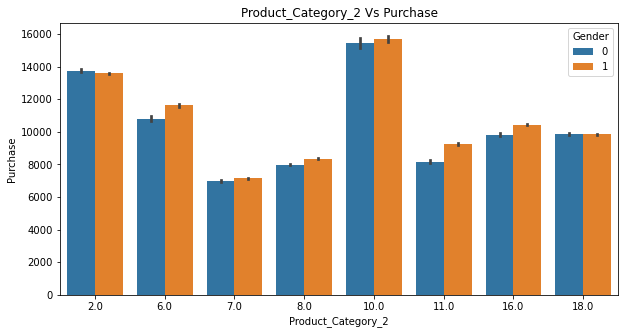

In [77]:
plt.figure(figsize=(10,5))
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df)
plt.title('Product_Category_2 Vs Purchase')

Text(0.5, 1.0, 'Product_Category_3 Vs Purchase')

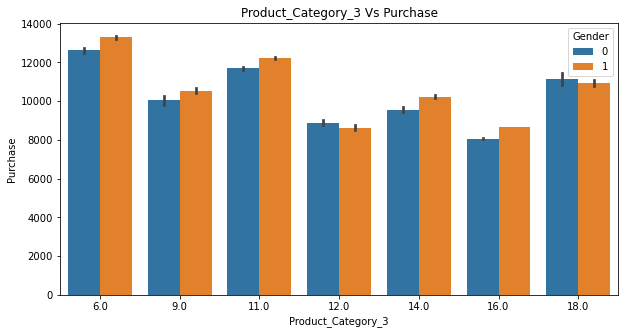

In [78]:
plt.figure(figsize=(10,5))
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df)
plt.title('Product_Category_3 Vs Purchase')

In [79]:
# Product category 1 have highest purchase but few products are not doing well.

In [80]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,0,0,2,17,8.0,16.0,8370.0
1,0,1,0,0,2,1,6.0,14.0,15200.0
2,0,1,0,0,2,12,8.0,16.0,1422.0
3,0,1,0,0,2,12,7.0,16.0,1057.0
4,1,7,5,2,4,8,8.0,16.0,7969.0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int32  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   City_Category               783667 non-null  int32  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
dtypes: float64(3), int32(2), int64(4)
memory usage: 53.8 MB


In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [83]:
x= df[['Age','Stay_In_Current_City_Years']]

In [84]:
vif_data = pd.DataFrame()

In [85]:
vif_data['features'] = x.columns

In [86]:
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

In [87]:
vif_data

,features,VIF
0,Age,2.41403
1,Stay_In_Current_City_Years,2.41403


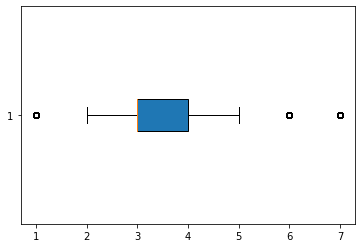

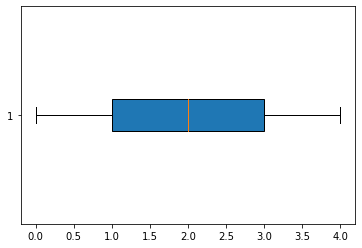

In [88]:
for column in x:
    plt.figure()
    plt.boxplot(x[column] , vert = False, patch_artist = True)

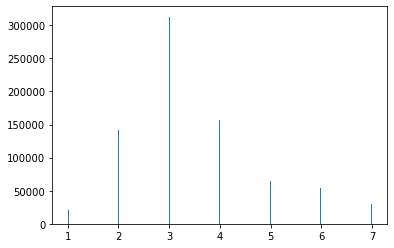

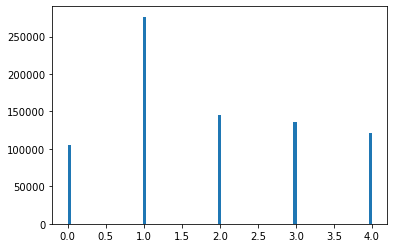

In [89]:
for column in x:
    plt.figure()
    plt.hist(x[column], bins = 'auto')

<AxesSubplot:>

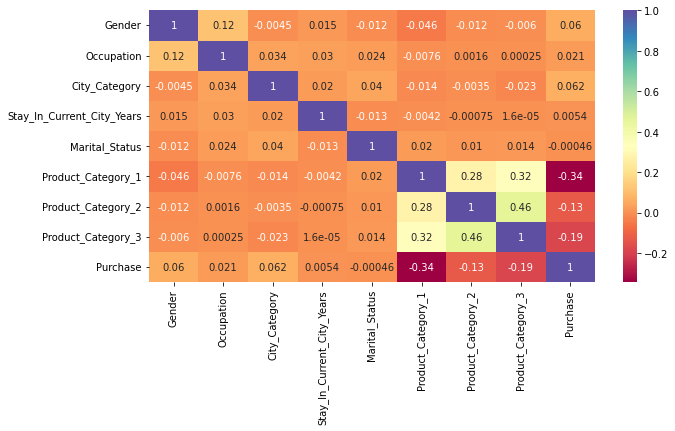

In [90]:
plt.figure(figsize=(10,5))
sns.heatmap(df_train.corr(), annot= True, cmap="Spectral")

In [91]:
df_test = df[df['Purchase'].isnull()]

In [92]:
del df_test['Purchase']

In [93]:
df_test.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3
0,1,5,5,1,2,1,11.0,16.0
1,1,3,17,2,0,17,11.0,16.0
2,0,4,1,1,4,5,7.0,16.0
3,0,4,1,1,4,4,7.0,16.0
4,0,3,1,2,1,4,11.0,12.0


In [94]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,0,0,2,17,8.0,16.0,8370.0
1,0,1,0,0,2,1,6.0,14.0,15200.0
2,0,1,0,0,2,12,8.0,16.0,1422.0
3,0,1,0,0,2,12,7.0,16.0,1057.0
4,1,7,5,2,4,8,8.0,16.0,7969.0


In [95]:
df_cl = df.copy()

In [96]:
df_cl.dropna(inplace= True)

In [97]:
x = df_cl.iloc[:, df.columns != 'Purchase']
y = df_cl.iloc[:, df.columns == 'Purchase']

In [98]:
y.tail()

,Purchase
550063,368.0
550064,371.0
550065,137.0
550066,365.0
550067,490.0


In [99]:
x_city_tr = pd.get_dummies(x['City_Category'], drop_first=True, prefix = "City_Cat")

In [100]:
x = pd.concat([x,x_city_tr], axis = 1)

In [101]:
del x['City_Category']

In [102]:
x.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3,City_Cat_1,City_Cat_2
0,0,1,0,2,17,8.0,16.0,0,0
1,0,1,0,2,1,6.0,14.0,0,0
2,0,1,0,2,12,8.0,16.0,0,0
3,0,1,0,2,12,7.0,16.0,0,0
4,1,7,5,4,8,8.0,16.0,0,1


In [103]:
df_city_te = pd.get_dummies(df_test['City_Category'], drop_first=True, prefix = "City_Cat")

In [104]:
df_test = pd.concat([df_test,df_city_te], axis = 1)

In [105]:
del df_test['City_Category']

In [106]:
x_occu_tr = pd.get_dummies(x['Occupation'], drop_first=True, prefix = "Occupation")

In [107]:
x = pd.concat([x,x_occu_tr], axis = 1)

In [108]:
del x['Occupation']

In [109]:
df_occu_te = pd.get_dummies(df_test['Occupation'], drop_first=True, prefix = "Occupation")

In [110]:
df_test = pd.concat([df_test,df_occu_te], axis = 1)

In [111]:
del df_test['Occupation']

In [112]:
x_pro1_tr = pd.get_dummies(x['Product_Category_1'], drop_first=True, prefix = "Pro_Cat1_")

In [113]:
x = pd.concat([x,x_pro1_tr], axis = 1)

In [114]:
del x['Product_Category_1']

In [115]:
df_pro1_te = pd.get_dummies(df_test['Product_Category_1'], drop_first=True, prefix = "Pro_Cat1_")

In [116]:
df_test = pd.concat([df_test,df_pro1_te], axis = 1)

In [117]:
del df_test['Product_Category_1']

In [118]:
x_pro2_tr = pd.get_dummies(x['Product_Category_2'], drop_first=True, prefix = "Pro_Cat2_")

In [119]:
x = pd.concat([x,x_pro2_tr], axis = 1)

In [120]:
del x['Product_Category_2']

In [121]:
df_pro2_te = pd.get_dummies(df_test['Product_Category_2'], drop_first=True, prefix = "Pro_Cat2_")

In [122]:
df_test = pd.concat([df_test,df_pro2_te], axis = 1)

In [123]:
del df_test['Product_Category_2']

In [124]:
x_pro3_tr = pd.get_dummies(x['Product_Category_3'], drop_first=True, prefix = "Pro_Cat3_")

In [125]:
x = pd.concat([x,x_pro3_tr], axis = 1)

In [126]:
del x['Product_Category_3']

In [127]:
df_pro3_te = pd.get_dummies(df_test['Product_Category_3'], drop_first=True, prefix = "Pro_Cat3_")

In [128]:
df_test = pd.concat([df_test,df_pro3_te], axis = 1)

In [129]:
del df_test['Product_Category_3']

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=123)

In [132]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [133]:
x_train = sc.fit_transform(x_train)

In [134]:
x_test = sc.fit_transform(x_test)

In [135]:
from sklearn.linear_model import SGDRegressor
sr = SGDRegressor()

In [136]:
mod = sr.fit(x_train,y_train)

In [137]:
y_pred_tr = mod.predict(x_train)

In [138]:
y_pred_te = mod.predict(x_test)

In [139]:
mod.score(x_train,y_train)

0.6401639658943574

In [140]:
mod.score(x_test,y_test)

0.6401177282884409

In [141]:
from sklearn.metrics import mean_squared_error

In [142]:
mean_squared_error(y_test,y_pred_te)

9080268.146198737

In [143]:
mod.intercept_

array([9247.16647272])

In [144]:
mod.coef_

array([-1.37907344e+01,  1.06628210e+02,  5.08375379e+00,  4.30939359e+01,
        2.45288082e+02, -1.89418943e+01,  7.52560749e+01,  1.38594155e+01,
        3.26691184e+01,  4.62945596e+01,  5.29654728e+00, -4.14669992e-01,
       -4.89578027e+02, -1.58079689e+03, -3.24743945e+03,  2.39755957e+02,
       -2.45646032e+03,  3.31399472e+02,  5.38926688e+02, -1.80644330e+03,
       -1.02924055e+03, -1.27936850e+03,  2.35078481e+01,  2.31105892e+02,
       -6.14552371e+02, -8.09180046e+02, -1.18072283e+03,  2.78268080e+01,
        6.76906340e+01,  1.24937325e+02,  6.51305841e+01, -1.31585932e+02,
        4.55033764e+01,  1.90135123e+01, -1.23146235e+02, -1.30912368e+02,
       -8.97184410e+01, -1.11665352e+02, -3.29129923e+02, -1.24319241e+01])

In [145]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 0 to 550067
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Gender                      550068 non-null  int32
 1   Age                         550068 non-null  int64
 2   Stay_In_Current_City_Years  550068 non-null  int64
 3   City_Cat_1                  550068 non-null  uint8
 4   City_Cat_2                  550068 non-null  uint8
 5   Occupation_1                550068 non-null  uint8
 6   Occupation_5                550068 non-null  uint8
 7   Occupation_9                550068 non-null  uint8
 8   Occupation_12               550068 non-null  uint8
 9   Occupation_15               550068 non-null  uint8
 10  Occupation_17               550068 non-null  uint8
 11  Occupation_19               550068 non-null  uint8
 12  Pro_Cat1__2                 550068 non-null  uint8
 13  Pro_Cat1__4                 550068 non-null 